In [122]:
%matplotlib inline

In [123]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [124]:
# Load file
city_data_df = pd.read_csv("city_data.csv")
ride_data_df = pd.read_csv("ride_data.csv")

In [125]:
combined_pyber_df = pd.merge(city_data_df, ride_data_df,
                                 how='outer', on='city')
combined_pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200210e+11


In [126]:
# Obtain the x and y coordinates for each of the three city types
rural_cities = combined_pyber_df[combined_pyber_df["type"] == "Rural"]
urban_cities = combined_pyber_df[combined_pyber_df["type"] == "Urban"]
suburban_cities = combined_pyber_df[combined_pyber_df["type"] == "Suburban"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_average_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_average_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_average_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

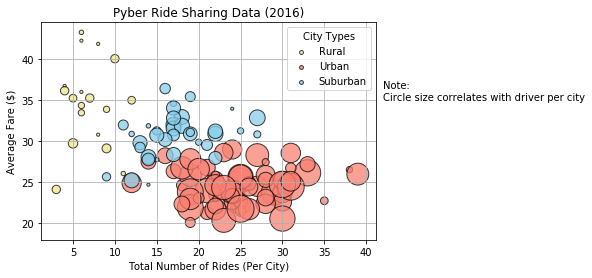

In [127]:
# Build the scatter plots for each city types
plt.scatter(rural_ride_count, rural_average_fare, marker="o", facecolors="khaki", edgecolors="black",
            s=rural_driver_count * 10, alpha=0.75, label = "Rural")

plt.scatter(urban_ride_count, urban_average_fare, marker="o", facecolors="salmon", edgecolors="black",
            s=urban_driver_count * 10, alpha=0.75, label = "Urban")

plt.scatter(suburban_ride_count, suburban_average_fare, marker="o", facecolors="skyblue", edgecolors="black",
            s=suburban_driver_count * 10, alpha=0.75, label = "Suburban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Incorporate a text label regarding circle size
plt.text(42,35,'Note: \nCircle size correlates with driver per city')

# Create a legend
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10, title = "City Types")
for i in lgnd.legendHandles:
    i.set_sizes([15.0])

In [128]:
# Calculate total fare
total_fare = combined_pyber_df["fare"].sum()

# Groupby type & fare
city_count = combined_pyber_df.groupby(["type"])["fare"].sum()

In [129]:
# Calculate total fare by city
fare_by_city = (city_count / total_fare) * 100
fare_by_city

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [130]:
fare_by_city_df = pd.DataFrame({"Total by City": city_count, "Fare Percentage": fare_by_city})
fare_by_city_df

,Total by City,Fare Percentage
type,,
Rural,4327.93,6.811493
Suburban,19356.33,30.463872
Urban,39854.38,62.724635


In [131]:
# Labels for the sections of our pie chart
labels = fare_by_city_df.index.values.tolist()

# The values of each section of the pie chart
sizes = fare_by_city_df.iloc[:,1].tolist()

# The colors of each section of the pie chart
colors = ["khaki", "skyblue", "salmon"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0.1)

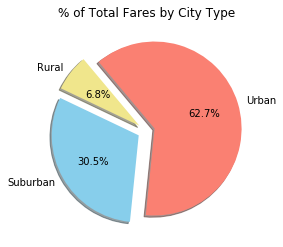

In [132]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)

plt.title("% of Total Fares by City Type")

plt.show()

In [133]:
# Calculate total rides
total_rides = combined_pyber_df["ride_id"].count()

# Groupby type & fare
type_count = combined_pyber_df.groupby(["type"])["ride_id"].count()

In [134]:
# Calculate rides by city
rides_by_city = (type_count / total_rides) * 100
rides_by_city

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [135]:
rides_by_city_df = pd.DataFrame({"Total Rides": type_count, "Type Percentage": rides_by_city})
rides_by_city_df

,Total Rides,Type Percentage
type,,
Rural,125,5.263158
Suburban,625,26.315789
Urban,1625,68.421053


In [136]:
# Labels for the sections of our pie chart
labels = rides_by_city_df.index.values.tolist()

# The values of each section of the pie chart
sizes = rides_by_city_df.iloc[:,1].tolist()

# The colors of each section of the pie chart
colors = ["khaki", "skyblue", "salmon"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0.1)

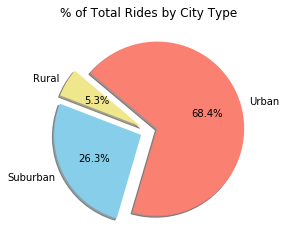

In [137]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")

plt.show()

In [138]:
# Calculate drivers by city type
total_drivers = city_data_df["driver_count"].sum()

# Groupby type & driver
driver_count = city_data_df.groupby(["type"])["driver_count"].sum()

In [139]:
# Calculate drivers by city type
driver_by_city = (driver_count / total_drivers) * 100
driver_by_city

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

In [140]:
drivers_by_city_df = pd.DataFrame({"Total Drivers": driver_count, "Driver Percentage": driver_by_city})
drivers_by_city_df

,Total Drivers,Driver Percentage
type,,
Rural,78,2.623613
Suburban,490,16.481668
Urban,2405,80.894719


In [141]:
# Labels for the sections of our pie chart
labels = drivers_by_city_df.index.values.tolist()

# The values of each section of the pie chart
sizes = drivers_by_city_df.iloc[:,1].tolist()

# The colors of each section of the pie chart
colors = ["khaki", "skyblue", "salmon"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0.1, 0.1)

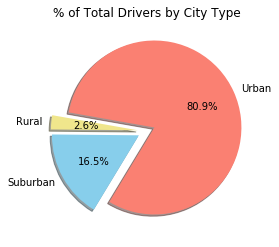

In [142]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170)

plt.title("% of Total Drivers by City Type")

plt.show()